In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
import pydot
import graphviz
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

In [2]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data = []
x_size_data = []
x_position_data = []
y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### データ
with open(one_hole_path) as f1:
  for line in f1:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])
with open(four_holes_path) as f2:
  for line in f2:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])
with open(nine_holes_path) as f3:
  for line in f3:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])
with open(sixteen_holes_path) as f4:
  for line in f4:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])
with open(twentyfive_holes_path) as f5:
  for line in f5:
    data_array = line.split(',')
    x_size_data.append(data_array[2])
    x_position_data.append(data_array[0:2])
    y_data.append(data_array[3:-1])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
x_size_data = np.array(x_size_data, dtype=float)
x_position_data = np.array(x_position_data, dtype=float)
y_data = np.array(y_data, dtype=float)

### データの加工
y_data = y_data - no_hole_data

### train用とtest用に分割(4:1)
x_size_train, x_size_test, x_position_train, x_position_test, y_train, y_test = train_test_split(x_size_data, x_position_data, y_data, test_size=0.20)


### reshape
x_size_train = x_size_train.reshape(8108, 1, 1)
x_size_test = x_size_test.reshape(2027, 1, 1)
x_position_train = x_position_train.reshape(8108, 2, 1)
x_position_test = x_position_test.reshape(2027, 2, 1)

In [3]:
print(y_data[0])

[ 2.557784  2.543381  2.538138  2.467777  2.378596  2.270771  2.102696
  1.942521  1.906544  1.816205  1.693835  1.548945  1.408147  1.163802
  0.97954   0.725496  0.057869 -0.476413 -0.579824 -1.230726 -2.269664
 -1.859676  0.        0.        0.        0.        0.       -2.516584
 -2.096461 -2.15331  -1.967765 -1.57313  -1.557507 -2.118946 -2.27163
 -2.375958 -2.430187 -2.530786 -2.498247 -2.625499 -2.705656 -2.638797
 -2.718241 -2.941427 -3.033957 -3.148112 -3.37039  -3.468686 -3.537617
 -3.560005]


In [12]:
# 入力を定義
size_input = Input(shape=(1,))
position_input = Input(shape=(2,))

# 入力1から結合前まで
x = Dense(1, activation="linear")(size_input)
x = Model(inputs=size_input, outputs=x)

# 入力2から結合前まで
y = Dense(1, activation="linear")(position_input)
y = Model(inputs=position_input, outputs=y)

# 結合
combined = concatenate([x.output, y.output])

# 密結合
z = Dense(128, activation="linear")(combined)
z = Dense(50, activation="linear")(z)

# モデル定義とコンパイル
model = Model(inputs=[x.input, y.input], outputs=z)
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 1)            2           input_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1)            3           input_4[0][0]                    
____________________________________________________________________________________________

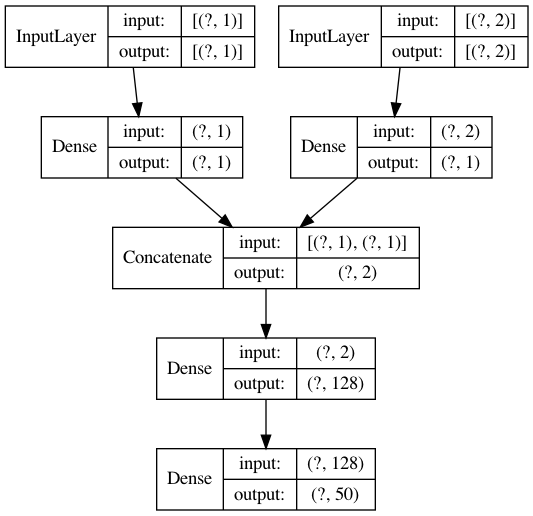

In [13]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [14]:
# 学習
epochs = 2000
batch_size = 128
history = model.fit([x_size_train, x_position_train], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test, x_position_test], y_test))

Epoch 1/2000
64/64 [==============================] - 0s 3ms/step - loss: 3.9459 - acc: 0.1675 - val_loss: 1.3004 - val_acc: 0.0054
Epoch 2/2000
64/64 [==============================] - 0s 2ms/step - loss: 1.1465 - acc: 0.0597 - val_loss: 0.9322 - val_acc: 0.0548
Epoch 3/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.9352 - acc: 0.3526 - val_loss: 0.8289 - val_acc: 0.4208
Epoch 4/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.8503 - acc: 0.4582 - val_loss: 0.7553 - val_acc: 0.7331
Epoch 5/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.7700 - acc: 0.4793 - val_loss: 0.6702 - val_acc: 0.2995
Epoch 6/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.6870 - acc: 0.3790 - val_loss: 0.5873 - val_acc: 0.5170
Epoch 7/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.5990 - acc: 0.4077 - val_loss: 0.4990 - val_acc: 0.1169
Epoch 8/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.

64/64 [==============================] - 0s 2ms/step - loss: 0.3642 - acc: 0.7890 - val_loss: 0.3168 - val_acc: 0.4031
Epoch 63/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.3672 - acc: 0.6198 - val_loss: 0.3109 - val_acc: 0.9669
Epoch 64/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3647 - acc: 0.7612 - val_loss: 0.3172 - val_acc: 0.9669
Epoch 65/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3656 - acc: 0.8409 - val_loss: 0.3102 - val_acc: 0.9669
Epoch 66/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3665 - acc: 0.7903 - val_loss: 0.3095 - val_acc: 0.9669
Epoch 67/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3657 - acc: 0.8245 - val_loss: 0.3151 - val_acc: 0.7834
Epoch 68/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3670 - acc: 0.8008 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 69/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3647 -

64/64 [==============================] - 0s 2ms/step - loss: 0.3640 - acc: 0.9444 - val_loss: 0.3099 - val_acc: 0.9669
Epoch 124/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3634 - acc: 0.9341 - val_loss: 0.3102 - val_acc: 0.9669
Epoch 125/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.3644 - acc: 0.9616 - val_loss: 0.3095 - val_acc: 0.8949
Epoch 126/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.3653 - acc: 0.9515 - val_loss: 0.3107 - val_acc: 0.9669
Epoch 127/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.3644 - acc: 0.9431 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 128/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3644 - acc: 0.9450 - val_loss: 0.3107 - val_acc: 0.9669
Epoch 129/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3637 - acc: 0.9542 - val_loss: 0.3105 - val_acc: 0.9669
Epoch 130/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - ETA: 0s - loss: 0.3162 - acc: 0.940 - 0s 2ms/step - loss: 0.3630 - acc: 0.9509 - val_loss: 0.3117 - val_acc: 0.9669
Epoch 185/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3650 - acc: 0.9461 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 186/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3637 - acc: 0.9611 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 187/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3634 - acc: 0.9542 - val_loss: 0.3100 - val_acc: 0.8451
Epoch 188/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3634 - acc: 0.9391 - val_loss: 0.3096 - val_acc: 0.9669
Epoch 189/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3638 - acc: 0.9663 - val_loss: 0.3097 - val_acc: 0.9669
Epoch 190/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3633 - acc: 0.9611 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 191/2000
64/64 [=================

Epoch 245/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9608 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 246/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3637 - acc: 0.9634 - val_loss: 0.3092 - val_acc: 0.9669
Epoch 247/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3634 - acc: 0.9660 - val_loss: 0.3112 - val_acc: 0.9669
Epoch 248/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3631 - acc: 0.9663 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 249/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3632 - acc: 0.9650 - val_loss: 0.3142 - val_acc: 0.9669
Epoch 250/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9646 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 251/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9663 - val_loss: 0.3077 - val_acc: 0.9669
Epoch 252/2000
64/64 [==============================] - 0s 2ms

64/64 [==============================] - 0s 2ms/step - loss: 0.3631 - acc: 0.9133 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 307/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3632 - acc: 0.9663 - val_loss: 0.3087 - val_acc: 0.9669
Epoch 308/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9270 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 309/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9528 - val_loss: 0.3101 - val_acc: 0.9669
Epoch 310/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9555 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 311/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9507 - val_loss: 0.3092 - val_acc: 0.9669
Epoch 312/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3630 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 313/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3632 - acc: 0.9556 - val_loss: 0.3087 - val_acc: 0.7918
Epoch 368/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9631 - val_loss: 0.3078 - val_acc: 0.9669
Epoch 369/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3630 - acc: 0.9462 - val_loss: 0.3098 - val_acc: 0.9669
Epoch 370/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9615 - val_loss: 0.3120 - val_acc: 0.9669
Epoch 371/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3633 - acc: 0.9568 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 372/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9530 - val_loss: 0.3090 - val_acc: 0.9669
Epoch 373/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9661 - val_loss: 0.3091 - val_acc: 0.9669
Epoch 374/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9483 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 429/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - acc: 0.9576 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 430/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 431/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9662 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 432/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 433/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 434/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3089 - val_acc: 0.9669
Epoch 435/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3634 - acc: 0.9662 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 490/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.8907 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 491/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3096 - val_acc: 0.9669
Epoch 492/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - acc: 0.9558 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 493/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 494/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9604 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 495/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9513 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 496/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 551/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 552/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9663 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 553/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3631 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 554/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9658 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 555/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 556/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9592 - val_loss: 0.3087 - val_acc: 0.9669
Epoch 557/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3630 - acc: 0.9265 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 612/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - acc: 0.8490 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 613/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 614/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3632 - acc: 0.9572 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 615/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 616/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 617/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9663 - val_loss: 0.3095 - val_acc: 0.9669
Epoch 618/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9591 - val_loss: 0.3082 - val_acc: 0.8737
Epoch 673/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9480 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 674/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 675/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 676/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9663 - val_loss: 0.3093 - val_acc: 0.9669
Epoch 677/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9440 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 678/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 679/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 734/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 735/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 736/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3095 - val_acc: 0.9669
Epoch 737/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 738/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3092 - val_acc: 0.9669
Epoch 739/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 740/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 795/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 796/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 797/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - acc: 0.9663 - val_loss: 0.3078 - val_acc: 0.9669
Epoch 798/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 799/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 800/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 801/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3092 - val_acc: 0.9669
Epoch 856/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 857/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 858/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 859/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.9663 - val_loss: 0.3077 - val_acc: 0.9669
Epoch 860/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - acc: 0.9663 - val_loss: 0.3091 - val_acc: 0.9669
Epoch 861/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 862/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 917/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 918/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 919/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - acc: 0.9663 - val_loss: 0.3089 - val_acc: 0.9669
Epoch 920/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 921/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 922/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 923/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 978/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 979/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3098 - val_acc: 0.9669
Epoch 980/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9663 - val_loss: 0.3087 - val_acc: 0.9669
Epoch 981/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 982/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 983/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9660 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 984/2000
64/64 [==============================] - 0s 2ms/step - loss: 0

Epoch 1038/2000
64/64 [==============================] - 0s 4ms/step - loss: 0.3632 - acc: 0.9599 - val_loss: 0.3092 - val_acc: 0.9669
Epoch 1039/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3630 - acc: 0.9663 - val_loss: 0.3091 - val_acc: 0.9669
Epoch 1040/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1041/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3091 - val_acc: 0.9669
Epoch 1042/2000
64/64 [==============================] - 0s 4ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1043/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1044/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1045/2000
64/64 [==============================] 

64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1099/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1100/2000
64/64 [==============================] - 0s 3ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1101/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3090 - val_acc: 0.9669
Epoch 1102/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1103/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1104/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1105/2000
64/64 [==============================] - 0s 2ms/step - 

Epoch 1159/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1160/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1161/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3090 - val_acc: 0.9669
Epoch 1162/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1163/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1164/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1165/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1166/2000
64/64 [==============================] 

64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1220/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1221/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1222/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1223/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1224/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1225/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1226/2000
64/64 [==============================] - 0s 2ms/step - 

Epoch 1280/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1281/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3078 - val_acc: 0.9669
Epoch 1282/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 1283/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3089 - val_acc: 0.9669
Epoch 1284/2000
64/64 [==============================] - 0s 4ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1285/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1286/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1287/2000
64/64 [==============================] 

64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1341/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1342/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3096 - val_acc: 0.9669
Epoch 1343/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1344/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3087 - val_acc: 0.9669
Epoch 1345/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1346/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1347/2000
64/64 [==============================] - 0s 2ms/step - 

Epoch 1401/2000
64/64 [==============================] - 0s 3ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1402/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3078 - val_acc: 0.9669
Epoch 1403/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1404/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1405/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1406/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1407/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1408/2000
64/64 [==============================] 

64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1462/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1463/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 1464/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1465/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3088 - val_acc: 0.9669
Epoch 1466/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3089 - val_acc: 0.9669
Epoch 1467/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3628 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1468/2000
64/64 [==============================] - 0s 2ms/step - 

Epoch 1522/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1523/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1524/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1525/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1526/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1527/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3077 - val_acc: 0.9669
Epoch 1528/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1529/2000
64/64 [==============================] 

64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3077 - val_acc: 0.9669
Epoch 1583/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1584/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1585/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1586/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1587/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1588/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1589/2000
64/64 [==============================] - 0s 2ms/step - 

Epoch 1643/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 1644/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1645/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3620 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1646/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1647/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1648/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1649/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1650/2000
64/64 [==============================] 

64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1704/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1705/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1706/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1707/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3620 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1708/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1709/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3087 - val_acc: 0.9669
Epoch 1710/2000
64/64 [==============================] - 0s 2ms/step - 

Epoch 1764/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1765/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3078 - val_acc: 0.9669
Epoch 1766/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1767/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3091 - val_acc: 0.9669
Epoch 1768/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1769/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3620 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1770/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1771/2000
64/64 [==============================] 

64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3077 - val_acc: 0.9669
Epoch 1825/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1826/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1827/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1828/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3085 - val_acc: 0.9669
Epoch 1829/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1830/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3620 - acc: 0.9663 - val_loss: 0.3086 - val_acc: 0.9669
Epoch 1831/2000
64/64 [==============================] - 0s 2ms/step - 

Epoch 1885/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1886/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3079 - val_acc: 0.9669
Epoch 1887/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3627 - acc: 0.9663 - val_loss: 0.3084 - val_acc: 0.9669
Epoch 1888/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1889/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1890/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3621 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1891/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3080 - val_acc: 0.9669
Epoch 1892/2000
64/64 [==============================] 

64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1946/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3622 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1947/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3626 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1948/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3624 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1949/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3083 - val_acc: 0.9669
Epoch 1950/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3082 - val_acc: 0.9669
Epoch 1951/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - acc: 0.9663 - val_loss: 0.3081 - val_acc: 0.9669
Epoch 1952/2000
64/64 [==============================] - 0s 2ms/step - 

In [ ]:
# 学習経過の可視化(大きさ)
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print(loss[-1])

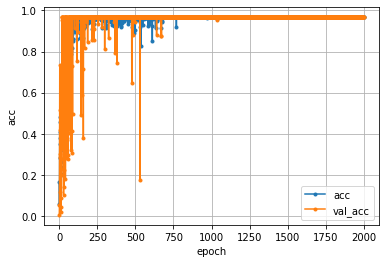

In [16]:
# 学習経過の可視化(大きさ)
acc     = history.history['acc']
val_acc = history.history['val_acc']

nb_epoch = len(acc)
plt.plot(range(nb_epoch), acc,     marker='.', label='acc')
plt.plot(range(nb_epoch), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [17]:
predict = model.predict([x_size_test, x_position_test])

In [18]:
print(predict[0]-y_test[0])

[-1.69108157e-02 -1.94768969e-02 -1.70367933e-02 -1.54423253e-02
 -1.28126909e-02 -1.13562796e-02 -5.55466292e-03 -1.79360582e-03
  6.20754213e-03  1.24530239e-02  1.72176573e-02  2.41643220e-02
  3.54102592e-02  3.85581459e-02  4.91921590e-02  5.67316662e-02
  6.22601273e-02  7.20209549e-02  7.79426271e-02  8.20923744e-02
  7.90735711e-02  6.12400753e-02 -5.79208136e-05  1.18210912e-04
 -1.73405558e-03  1.51365157e-03 -3.58205289e-04  1.65136353e-02
  1.33145083e-02  4.11977005e-04 -1.82264548e-02 -4.08559414e-02
 -6.40310887e-02 -9.81104323e-02 -1.22650070e-01 -1.47352075e-01
 -1.69745864e-01 -1.94717885e-01 -2.15330117e-01 -2.38647169e-01
 -2.56285287e-01 -2.71917708e-01 -2.91665247e-01 -3.09072147e-01
 -3.27455521e-01 -3.39527591e-01 -3.55546299e-01 -3.63783812e-01
 -3.71805181e-01 -3.74645918e-01]


In [19]:
print(predict[0])
print(y_test[0])

[ 2.6142862e+00  2.5901041e+00  2.5657072e+00  2.5065017e+00
  2.4275453e+00  2.3257067e+00  2.1661193e+00  2.0117724e+00
  1.9853365e+00  1.9020190e+00  1.7848597e+00  1.6470773e+00
  1.5174313e+00  1.2759151e+00  1.1016622e+00  8.5415167e-01
  1.9085713e-01 -3.3560205e-01 -4.3657237e-01 -1.0879086e+00
 -2.1366224e+00 -1.7604079e+00 -5.7920814e-05  1.1821091e-04
 -1.7340556e-03  1.5136516e-03 -3.5820529e-04 -2.4222844e+00
 -1.9664265e+00 -2.0050380e+00 -1.8130285e+00 -1.4203219e+00
 -1.4065261e+00 -1.9763194e+00 -2.1318281e+00 -2.2403641e+00
 -2.2975469e+00 -2.4036019e+00 -2.3749461e+00 -2.5072172e+00
 -2.5882733e+00 -2.5241177e+00 -2.6088552e+00 -2.8331141e+00
 -2.9317045e+00 -3.0467136e+00 -3.2727623e+00 -3.3717718e+00
 -3.4438832e+00 -3.4674959e+00]
[ 2.631197  2.609581  2.582744  2.521944  2.440358  2.337063  2.171674
  2.013566  1.979129  1.889566  1.767642  1.622913  1.482021  1.237357
  1.05247   0.79742   0.128597 -0.407623 -0.514515 -1.170001 -2.215696
 -1.821648  0.        0

In [4]:
#2つ目のモデル
# 入力を定義
size_input = Input(shape=(1,))
position_input = Input(shape=(2,))

# 入力1から結合前まで
x = Dense(1, activation="linear")(size_input)
x = Model(inputs=size_input, outputs=x)

# 入力2から結合前まで
y = Dense(1, activation="linear")(position_input)
y = Model(inputs=position_input, outputs=y)

# 結合
combined = concatenate([x.output, y.output])

# 密結合
z = Dense(64, activation="linear")(combined)
z = Dense(128, activation="tanh")(z)
z = Dense(256, activation="tanh")(z)
z = Dense(128, activation="tanh")(z)
z = Dense(50, activation="linear")(z)

# モデル定義とコンパイル
model2 = Model(inputs=[x.input, y.input], outputs=z)
model2.compile(loss='mse', optimizer='adam', metrics=['acc'])
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            2           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            3           input_2[0][0]                    
____________________________________________________________________________________________

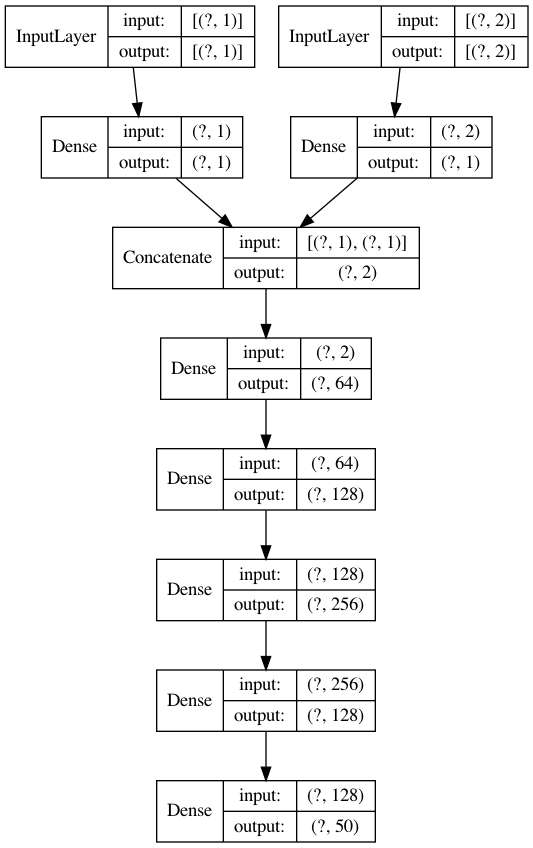

In [5]:
plot_model(model2, show_shapes=True, show_layer_names=False)

In [6]:
# 学習
epochs = 3000
batch_size = 128
history2 = model2.fit([x_size_train, x_position_train], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test, x_position_test], y_test))

Epoch 1/3000
64/64 [==============================] - 0s 5ms/step - loss: 0.7099 - acc: 0.3811 - val_loss: 0.4126 - val_acc: 0.0770
Epoch 2/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3812 - acc: 0.3929 - val_loss: 0.4025 - val_acc: 0.9497
Epoch 3/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3672 - acc: 0.3982 - val_loss: 0.3811 - val_acc: 9.8668e-04
Epoch 4/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3429 - acc: 0.4922 - val_loss: 0.3371 - val_acc: 0.7647
Epoch 5/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3043 - acc: 0.6537 - val_loss: 0.3182 - val_acc: 0.7676
Epoch 6/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2849 - acc: 0.6730 - val_loss: 0.3049 - val_acc: 0.9107
Epoch 7/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2683 - acc: 0.6577 - val_loss: 0.2944 - val_acc: 0.7346
Epoch 8/3000
64/64 [==============================] - 0s 3ms/step - loss

64/64 [==============================] - 0s 3ms/step - loss: 0.2485 - acc: 0.8156 - val_loss: 0.2936 - val_acc: 0.9290
Epoch 124/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2528 - acc: 0.8954 - val_loss: 0.2827 - val_acc: 0.9304
Epoch 125/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2483 - acc: 0.8707 - val_loss: 0.2861 - val_acc: 0.8076
Epoch 126/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2461 - acc: 0.8864 - val_loss: 0.2766 - val_acc: 0.9270
Epoch 127/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2444 - acc: 0.9028 - val_loss: 0.2832 - val_acc: 0.9299
Epoch 128/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2473 - acc: 0.8816 - val_loss: 0.2867 - val_acc: 0.9285
Epoch 129/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2498 - acc: 0.8825 - val_loss: 0.2827 - val_acc: 0.9275
Epoch 130/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.2510 - acc: 0.9425 - val_loss: 0.2607 - val_acc: 0.9349
Epoch 246/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2226 - acc: 0.9412 - val_loss: 0.2567 - val_acc: 0.9373
Epoch 247/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2250 - acc: 0.9457 - val_loss: 0.2609 - val_acc: 0.9299
Epoch 248/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2213 - acc: 0.9407 - val_loss: 0.2521 - val_acc: 0.9359
Epoch 249/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2117 - acc: 0.9425 - val_loss: 0.2410 - val_acc: 0.9373
Epoch 250/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2143 - acc: 0.9473 - val_loss: 0.2455 - val_acc: 0.9393
Epoch 251/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2097 - acc: 0.9466 - val_loss: 0.2350 - val_acc: 0.9418
Epoch 252/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0877 - acc: 0.9509 - val_loss: 0.0921 - val_acc: 0.9443
Epoch 368/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0816 - acc: 0.9504 - val_loss: 0.1032 - val_acc: 0.9413
Epoch 369/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0802 - acc: 0.9526 - val_loss: 0.0883 - val_acc: 0.9472
Epoch 370/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0859 - acc: 0.9551 - val_loss: 0.0891 - val_acc: 0.9477
Epoch 371/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0802 - acc: 0.9533 - val_loss: 0.0885 - val_acc: 0.9462
Epoch 372/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0886 - acc: 0.9539 - val_loss: 0.1021 - val_acc: 0.9433
Epoch 373/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1625 - acc: 0.9523 - val_loss: 0.1521 - val_acc: 0.9551
Epoch 374/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.1101 - acc: 0.9311 - val_loss: 0.1238 - val_acc: 0.9497
Epoch 490/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1030 - acc: 0.8168 - val_loss: 0.1153 - val_acc: 0.2708
Epoch 491/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1027 - acc: 0.8698 - val_loss: 0.1217 - val_acc: 0.9502
Epoch 492/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1057 - acc: 0.9414 - val_loss: 0.1132 - val_acc: 0.9418
Epoch 493/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2128 - acc: 0.7785 - val_loss: 0.2884 - val_acc: 0.9507
Epoch 494/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1932 - acc: 0.6466 - val_loss: 0.1656 - val_acc: 0.2037
Epoch 495/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1298 - acc: 0.7258 - val_loss: 0.1381 - val_acc: 0.9521
Epoch 496/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.1377 - acc: 0.9634 - val_loss: 0.1313 - val_acc: 0.9561
Epoch 612/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1078 - acc: 0.9653 - val_loss: 0.1315 - val_acc: 0.9586
Epoch 613/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1690 - acc: 0.9635 - val_loss: 0.3373 - val_acc: 0.9531
Epoch 614/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2140 - acc: 0.8762 - val_loss: 0.1556 - val_acc: 0.9452
Epoch 615/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1146 - acc: 0.9650 - val_loss: 0.1189 - val_acc: 0.9591
Epoch 616/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1143 - acc: 0.9673 - val_loss: 0.1247 - val_acc: 0.9536
Epoch 617/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1147 - acc: 0.9662 - val_loss: 0.1202 - val_acc: 0.9581
Epoch 618/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.1095 - acc: 0.9672 - val_loss: 0.1473 - val_acc: 0.9591
Epoch 734/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1496 - acc: 0.9666 - val_loss: 0.2823 - val_acc: 0.9556
Epoch 735/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1960 - acc: 0.9652 - val_loss: 0.1753 - val_acc: 0.9566
Epoch 736/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1474 - acc: 0.9666 - val_loss: 0.1622 - val_acc: 0.9615
Epoch 737/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1389 - acc: 0.9674 - val_loss: 0.1726 - val_acc: 0.9591
Epoch 738/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1256 - acc: 0.9661 - val_loss: 0.1319 - val_acc: 0.9566
Epoch 739/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1133 - acc: 0.9663 - val_loss: 0.1240 - val_acc: 0.9576
Epoch 740/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.1652 - acc: 0.9640 - val_loss: 0.1627 - val_acc: 0.9512
Epoch 856/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1174 - acc: 0.9655 - val_loss: 0.1242 - val_acc: 0.9561
Epoch 857/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1036 - acc: 0.9665 - val_loss: 0.1192 - val_acc: 0.9536
Epoch 858/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0931 - acc: 0.9662 - val_loss: 0.1042 - val_acc: 0.9566
Epoch 859/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0898 - acc: 0.9666 - val_loss: 0.0984 - val_acc: 0.9581
Epoch 860/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0966 - acc: 0.9660 - val_loss: 0.1304 - val_acc: 0.9586
Epoch 861/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0971 - acc: 0.9656 - val_loss: 0.1247 - val_acc: 0.9595
Epoch 862/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.1013 - acc: 0.9661 - val_loss: 0.1098 - val_acc: 0.9586
Epoch 978/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0927 - acc: 0.9663 - val_loss: 0.1077 - val_acc: 0.9595
Epoch 979/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0994 - acc: 0.9671 - val_loss: 0.1042 - val_acc: 0.9581
Epoch 980/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0920 - acc: 0.9669 - val_loss: 0.1077 - val_acc: 0.9556
Epoch 981/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0918 - acc: 0.9673 - val_loss: 0.0991 - val_acc: 0.9630
Epoch 982/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0932 - acc: 0.9677 - val_loss: 0.1779 - val_acc: 0.9561
Epoch 983/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1306 - acc: 0.9662 - val_loss: 0.1158 - val_acc: 0.9556
Epoch 984/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

Epoch 1038/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0921 - acc: 0.9658 - val_loss: 0.1041 - val_acc: 0.9625
Epoch 1039/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0906 - acc: 0.9658 - val_loss: 0.1283 - val_acc: 0.9556
Epoch 1040/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1012 - acc: 0.9652 - val_loss: 0.1046 - val_acc: 0.9586
Epoch 1041/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0871 - acc: 0.9663 - val_loss: 0.1023 - val_acc: 0.9566
Epoch 1042/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0865 - acc: 0.9658 - val_loss: 0.0994 - val_acc: 0.9595
Epoch 1043/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0877 - acc: 0.9650 - val_loss: 0.0986 - val_acc: 0.9581
Epoch 1044/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0826 - acc: 0.9662 - val_loss: 0.0993 - val_acc: 0.9620
Epoch 1045/3000
64/64 [==============================] 

Epoch 1159/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0960 - acc: 0.9644 - val_loss: 0.1029 - val_acc: 0.9591
Epoch 1160/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0968 - acc: 0.9639 - val_loss: 0.1039 - val_acc: 0.9576
Epoch 1161/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0970 - acc: 0.9637 - val_loss: 0.1045 - val_acc: 0.9566
Epoch 1162/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0999 - acc: 0.9639 - val_loss: 0.1144 - val_acc: 0.9566
Epoch 1163/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1009 - acc: 0.9639 - val_loss: 0.1227 - val_acc: 0.9576
Epoch 1164/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1156 - acc: 0.9628 - val_loss: 0.1480 - val_acc: 0.9581
Epoch 1165/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1306 - acc: 0.9631 - val_loss: 0.1094 - val_acc: 0.9551
Epoch 1166/3000
64/64 [==============================] 

Epoch 1280/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0802 - acc: 0.9662 - val_loss: 0.1038 - val_acc: 0.9600
Epoch 1281/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0756 - acc: 0.9653 - val_loss: 0.0937 - val_acc: 0.9566
Epoch 1282/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0944 - acc: 0.9653 - val_loss: 0.1431 - val_acc: 0.9610
Epoch 1283/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0898 - acc: 0.9656 - val_loss: 0.0868 - val_acc: 0.9571
Epoch 1284/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0784 - acc: 0.9669 - val_loss: 0.0933 - val_acc: 0.9566
Epoch 1285/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0748 - acc: 0.9663 - val_loss: 0.0823 - val_acc: 0.9586
Epoch 1286/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0866 - acc: 0.9667 - val_loss: 0.0839 - val_acc: 0.9595
Epoch 1287/3000
64/64 [==============================] 

Epoch 1401/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0648 - acc: 0.9669 - val_loss: 0.0867 - val_acc: 0.9556
Epoch 1402/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0924 - acc: 0.9674 - val_loss: 0.1041 - val_acc: 0.9561
Epoch 1403/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0942 - acc: 0.9661 - val_loss: 0.0945 - val_acc: 0.9660
Epoch 1404/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0904 - acc: 0.9665 - val_loss: 0.1947 - val_acc: 0.9541
Epoch 1405/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1233 - acc: 0.9647 - val_loss: 0.0869 - val_acc: 0.9615
Epoch 1406/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0806 - acc: 0.9665 - val_loss: 0.0923 - val_acc: 0.9571
Epoch 1407/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0705 - acc: 0.9663 - val_loss: 0.0868 - val_acc: 0.9591
Epoch 1408/3000
64/64 [==============================] 

Epoch 1522/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1289 - acc: 0.9651 - val_loss: 0.1406 - val_acc: 0.9551
Epoch 1523/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0963 - acc: 0.9642 - val_loss: 0.0847 - val_acc: 0.9576
Epoch 1524/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0775 - acc: 0.9660 - val_loss: 0.2369 - val_acc: 0.9521
Epoch 1525/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1048 - acc: 0.9669 - val_loss: 0.0852 - val_acc: 0.9551
Epoch 1526/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0785 - acc: 0.9663 - val_loss: 0.0866 - val_acc: 0.9576
Epoch 1527/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0680 - acc: 0.9669 - val_loss: 0.0776 - val_acc: 0.9635
Epoch 1528/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0668 - acc: 0.9681 - val_loss: 0.0782 - val_acc: 0.9566
Epoch 1529/3000
64/64 [==============================] 

Epoch 1643/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0779 - acc: 0.9483 - val_loss: 0.0890 - val_acc: 0.9433
Epoch 1644/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0711 - acc: 0.9541 - val_loss: 0.0732 - val_acc: 0.9393
Epoch 1645/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0854 - acc: 0.9551 - val_loss: 0.0815 - val_acc: 0.9487
Epoch 1646/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0823 - acc: 0.9514 - val_loss: 0.0811 - val_acc: 0.9457
Epoch 1647/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0771 - acc: 0.9551 - val_loss: 0.1134 - val_acc: 0.9433
Epoch 1648/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1139 - acc: 0.9488 - val_loss: 0.2385 - val_acc: 0.9502
Epoch 1649/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1141 - acc: 0.9518 - val_loss: 0.0895 - val_acc: 0.9472
Epoch 1650/3000
64/64 [==============================] 

Epoch 1764/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0944 - acc: 0.9626 - val_loss: 0.0986 - val_acc: 0.9571
Epoch 1765/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0927 - acc: 0.9624 - val_loss: 0.1049 - val_acc: 0.9576
Epoch 1766/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0881 - acc: 0.9648 - val_loss: 0.1014 - val_acc: 0.9576
Epoch 1767/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0891 - acc: 0.9634 - val_loss: 0.0974 - val_acc: 0.9551
Epoch 1768/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0931 - acc: 0.9620 - val_loss: 0.1251 - val_acc: 0.9571
Epoch 1769/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0967 - acc: 0.9642 - val_loss: 0.0992 - val_acc: 0.9581
Epoch 1770/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1044 - acc: 0.9639 - val_loss: 0.1013 - val_acc: 0.9576
Epoch 1771/3000
64/64 [==============================] 

Epoch 1885/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1134 - acc: 0.9639 - val_loss: 0.1045 - val_acc: 0.9551
Epoch 1886/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0944 - acc: 0.9661 - val_loss: 0.0859 - val_acc: 0.9576
Epoch 1887/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0837 - acc: 0.9658 - val_loss: 0.0912 - val_acc: 0.9526
Epoch 1888/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0778 - acc: 0.9657 - val_loss: 0.0926 - val_acc: 0.9561
Epoch 1889/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0776 - acc: 0.9650 - val_loss: 0.0816 - val_acc: 0.9556
Epoch 1890/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0774 - acc: 0.9666 - val_loss: 0.0848 - val_acc: 0.9571
Epoch 1891/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0745 - acc: 0.9657 - val_loss: 0.0788 - val_acc: 0.9556
Epoch 1892/3000
64/64 [==============================] 

Epoch 2006/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1491 - acc: 0.9665 - val_loss: 0.1493 - val_acc: 0.9595
Epoch 2007/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1237 - acc: 0.9634 - val_loss: 0.1535 - val_acc: 0.9521
Epoch 2008/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1196 - acc: 0.9583 - val_loss: 0.1882 - val_acc: 0.9472
Epoch 2009/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1287 - acc: 0.9584 - val_loss: 0.1118 - val_acc: 0.9477
Epoch 2010/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1135 - acc: 0.9561 - val_loss: 0.1622 - val_acc: 0.9487
Epoch 2011/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1166 - acc: 0.9573 - val_loss: 0.1111 - val_acc: 0.9551
Epoch 2012/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0991 - acc: 0.9663 - val_loss: 0.0975 - val_acc: 0.9571
Epoch 2013/3000
64/64 [==============================] 

Epoch 2127/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0893 - acc: 0.9681 - val_loss: 0.0874 - val_acc: 0.9595
Epoch 2128/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0982 - acc: 0.9676 - val_loss: 0.0830 - val_acc: 0.9630
Epoch 2129/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0804 - acc: 0.9684 - val_loss: 0.0877 - val_acc: 0.9571
Epoch 2130/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0741 - acc: 0.9699 - val_loss: 0.0861 - val_acc: 0.9610
Epoch 2131/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0721 - acc: 0.9687 - val_loss: 0.0814 - val_acc: 0.9655
Epoch 2132/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2961 - acc: 0.9656 - val_loss: 0.3121 - val_acc: 0.9595
Epoch 2133/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2356 - acc: 0.9663 - val_loss: 0.2720 - val_acc: 0.9591
Epoch 2134/3000
64/64 [==============================] 

Epoch 2248/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1107 - acc: 0.9672 - val_loss: 0.1237 - val_acc: 0.9640
Epoch 2249/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1064 - acc: 0.9689 - val_loss: 0.1205 - val_acc: 0.9610
Epoch 2250/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1087 - acc: 0.9677 - val_loss: 0.1230 - val_acc: 0.9615
Epoch 2251/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1139 - acc: 0.9684 - val_loss: 0.1533 - val_acc: 0.9605
Epoch 2252/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1137 - acc: 0.9683 - val_loss: 0.1177 - val_acc: 0.9595
Epoch 2253/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1059 - acc: 0.9677 - val_loss: 0.1156 - val_acc: 0.9610
Epoch 2254/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1114 - acc: 0.9684 - val_loss: 0.1257 - val_acc: 0.9595
Epoch 2255/3000
64/64 [==============================] 

Epoch 2369/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1037 - acc: 0.9681 - val_loss: 0.1166 - val_acc: 0.9581
Epoch 2370/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1018 - acc: 0.9687 - val_loss: 0.1102 - val_acc: 0.9605
Epoch 2371/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1017 - acc: 0.9683 - val_loss: 0.1535 - val_acc: 0.9605
Epoch 2372/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1194 - acc: 0.9674 - val_loss: 0.1399 - val_acc: 0.9605
Epoch 2373/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1299 - acc: 0.9688 - val_loss: 0.1320 - val_acc: 0.9600
Epoch 2374/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1237 - acc: 0.9689 - val_loss: 0.1977 - val_acc: 0.9600
Epoch 2375/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1396 - acc: 0.9667 - val_loss: 0.1346 - val_acc: 0.9615
Epoch 2376/3000
64/64 [==============================] 

Epoch 2490/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0868 - acc: 0.9672 - val_loss: 0.1097 - val_acc: 0.9576
Epoch 2491/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0863 - acc: 0.9668 - val_loss: 0.1299 - val_acc: 0.9566
Epoch 2492/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0911 - acc: 0.9666 - val_loss: 0.1190 - val_acc: 0.9566
Epoch 2493/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0926 - acc: 0.9660 - val_loss: 0.1069 - val_acc: 0.9556
Epoch 2494/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0901 - acc: 0.9677 - val_loss: 0.1116 - val_acc: 0.9546
Epoch 2495/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0914 - acc: 0.9662 - val_loss: 0.0997 - val_acc: 0.9556
Epoch 2496/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0810 - acc: 0.9667 - val_loss: 0.0941 - val_acc: 0.9541
Epoch 2497/3000
64/64 [==============================] 

Epoch 2611/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0843 - acc: 0.9666 - val_loss: 0.0934 - val_acc: 0.9556
Epoch 2612/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0870 - acc: 0.9657 - val_loss: 0.0929 - val_acc: 0.9615
Epoch 2613/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0835 - acc: 0.9661 - val_loss: 0.0921 - val_acc: 0.9546
Epoch 2614/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0807 - acc: 0.9660 - val_loss: 0.1009 - val_acc: 0.9561
Epoch 2615/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0813 - acc: 0.9653 - val_loss: 0.0979 - val_acc: 0.9546
Epoch 2616/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0832 - acc: 0.9655 - val_loss: 0.0872 - val_acc: 0.9556
Epoch 2617/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0839 - acc: 0.9660 - val_loss: 0.1070 - val_acc: 0.9566
Epoch 2618/3000
64/64 [==============================] 

Epoch 2732/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1464 - acc: 0.9657 - val_loss: 0.1575 - val_acc: 0.9551
Epoch 2733/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1345 - acc: 0.9663 - val_loss: 0.1375 - val_acc: 0.9576
Epoch 2734/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1331 - acc: 0.9668 - val_loss: 0.1381 - val_acc: 0.9561
Epoch 2735/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1409 - acc: 0.9663 - val_loss: 0.1504 - val_acc: 0.9581
Epoch 2736/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1345 - acc: 0.9665 - val_loss: 0.1503 - val_acc: 0.9581
Epoch 2737/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1410 - acc: 0.9665 - val_loss: 0.1458 - val_acc: 0.9581
Epoch 2738/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1407 - acc: 0.9662 - val_loss: 0.1421 - val_acc: 0.9566
Epoch 2739/3000
64/64 [==============================] 

Epoch 2853/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1234 - acc: 0.9671 - val_loss: 0.1364 - val_acc: 0.9595
Epoch 2854/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1180 - acc: 0.9673 - val_loss: 0.1393 - val_acc: 0.9586
Epoch 2855/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1243 - acc: 0.9677 - val_loss: 0.1274 - val_acc: 0.9600
Epoch 2856/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1221 - acc: 0.9668 - val_loss: 0.1354 - val_acc: 0.9620
Epoch 2857/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1222 - acc: 0.9673 - val_loss: 0.1290 - val_acc: 0.9605
Epoch 2858/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1273 - acc: 0.9671 - val_loss: 0.1283 - val_acc: 0.9605
Epoch 2859/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1194 - acc: 0.9665 - val_loss: 0.1250 - val_acc: 0.9595
Epoch 2860/3000
64/64 [==============================] 

Epoch 2974/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1094 - acc: 0.9665 - val_loss: 0.1235 - val_acc: 0.9595
Epoch 2975/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1036 - acc: 0.9678 - val_loss: 0.1214 - val_acc: 0.9640
Epoch 2976/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1057 - acc: 0.9671 - val_loss: 0.1231 - val_acc: 0.9586
Epoch 2977/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1047 - acc: 0.9677 - val_loss: 0.1309 - val_acc: 0.9620
Epoch 2978/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1140 - acc: 0.9665 - val_loss: 0.1246 - val_acc: 0.9605
Epoch 2979/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1136 - acc: 0.9674 - val_loss: 0.1169 - val_acc: 0.9576
Epoch 2980/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1214 - acc: 0.9666 - val_loss: 0.1337 - val_acc: 0.9556
Epoch 2981/3000
64/64 [==============================] 

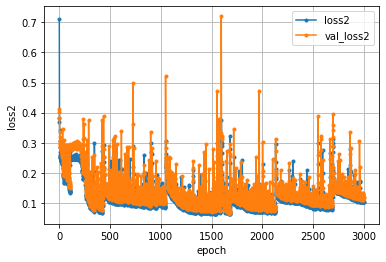

In [7]:
# 学習経過の可視化(大きさ)
loss2     = history2.history['loss']
val_loss2 = history2.history['val_loss']

nb_epoch = len(loss2)
plt.plot(range(nb_epoch), loss2,     marker='.', label='loss2')
plt.plot(range(nb_epoch), val_loss2, marker='.', label='val_loss2')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss2')
plt.show()

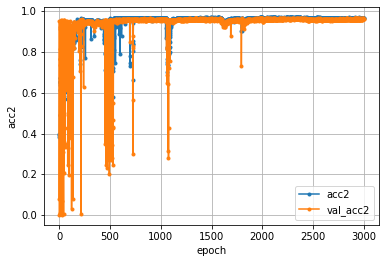

In [8]:
# 学習経過の可視化(大きさ)
acc2     = history2.history['acc']
val_acc2 = history2.history['val_acc']

nb_epoch = len(acc2)
plt.plot(range(nb_epoch), acc2,     marker='.', label='acc2')
plt.plot(range(nb_epoch), val_acc2, marker='.', label='val_acc2')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc2')
plt.show()

In [9]:
predict2 = model2.predict([x_size_test, x_position_test])
print(x_position_test[0])
print(predict2[0]-y_test[0])
print(x_position_test[1])
print(predict2[1]-y_test[1])

[[38.5]
 [21.5]]
[-2.00298672e-03 -1.59025943e-03  5.86756699e-04  4.11689995e-03
  8.06191124e-03  1.15077754e-02  1.51614285e-02  1.90208758e-02
  2.27203472e-02  2.34877815e-02  2.42906497e-02  2.81130866e-02
  3.30420722e-02  3.62808760e-02  4.00873476e-02  4.32681874e-02
  4.52947211e-02  4.72288181e-02  5.37033399e-02  6.45259917e-02
  7.45966885e-02  4.54866960e-02 -1.45515427e-04  4.83118417e-03
  1.11624599e-04  5.07462770e-04 -3.92738730e-04  1.63584904e-02
 -1.96245436e-02 -6.83684958e-02 -1.02957894e-01 -1.35525678e-01
 -1.68293104e-01 -2.02044201e-01 -2.23329589e-01 -2.40371380e-01
 -2.53583197e-01 -2.67964845e-01 -2.80327355e-01 -2.95938626e-01
 -3.09527650e-01 -3.18972551e-01 -3.29614150e-01 -3.39622904e-01
 -3.46871087e-01 -3.52721579e-01 -3.58077484e-01 -3.60928043e-01
 -3.62852171e-01 -3.63464210e-01]
[[ 3.]
 [12.]]
[-2.21530764e-01 -2.20360201e-01 -2.14895675e-01 -2.06055331e-01
 -1.94630895e-01 -1.81722600e-01 -1.68042953e-01 -1.51705440e-01
 -1.30755538e-01 -1.1372

In [10]:
print(predict2[0])
print(y_test[0])

[ 2.6469550e+00  2.6257567e+00  2.6011198e+00  2.5438869e+00
  2.4662969e+00  2.3665128e+00  2.2048454e+00  2.0506809e+00
  2.0200593e+00  1.9313698e+00  1.8103456e+00  1.6695161e+00
  1.5336031e+00  1.2921839e+00  1.1110533e+00  8.5903919e-01
  1.9202572e-01 -3.4265518e-01 -4.4386366e-01 -1.0896480e+00
 -2.1269853e+00 -1.7662003e+00 -1.4551543e-04  4.8311842e-03
  1.1162460e-04  5.0746277e-04 -3.9273873e-04 -2.4062395e+00
 -1.9760855e+00 -2.0456605e+00 -1.8664949e+00 -1.4818727e+00
 -1.4764111e+00 -2.0455482e+00 -2.1987486e+00 -2.3015094e+00
 -2.3523922e+00 -2.4518518e+00 -2.4192224e+00 -2.5493376e+00
 -2.6323617e+00 -2.5672956e+00 -2.6494431e+00 -2.8745079e+00
 -2.9687791e+00 -3.0841346e+00 -3.3071685e+00 -3.4057550e+00
 -3.4750562e+00 -3.4975562e+00]
[ 2.648958  2.627347  2.600533  2.53977   2.458235  2.355005  2.189684
  2.03166   1.997339  1.907882  1.786055  1.641403  1.500561  1.255903
  1.070966  0.815771  0.146731 -0.389884 -0.497567 -1.154174 -2.201582
 -1.811687  0.        0

In [20]:
#2つ目のモデル
# 入力を定義
size_input = Input(shape=(1,))
position_input = Input(shape=(2,))

# 入力1から結合前まで
x = Dense(1, activation="linear")(size_input)
x = Model(inputs=size_input, outputs=x)

# 入力2から結合前まで
y = Dense(1, activation="linear")(position_input)
y = Model(inputs=position_input, outputs=y)

# 結合
combined = concatenate([x.output, y.output])

# 密結合
z = Dense(64, activation="linear")(combined)
z = Dense(128, activation="tanh")(z)
z = Dense(256, activation="tanh")(z)
z = Dense(128, activation="tanh")(z)
z = Dense(64, activation="tanh")(z)
z = Dense(50, activation="linear")(z)

# モデル定義とコンパイル
model3 = Model(inputs=[x.input, y.input], outputs=z)
model3.compile(loss='mse', optimizer='adam', metrics=['acc'])
model3.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 1)            2           input_5[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 1)            3           input_6[0][0]                    
____________________________________________________________________________________________

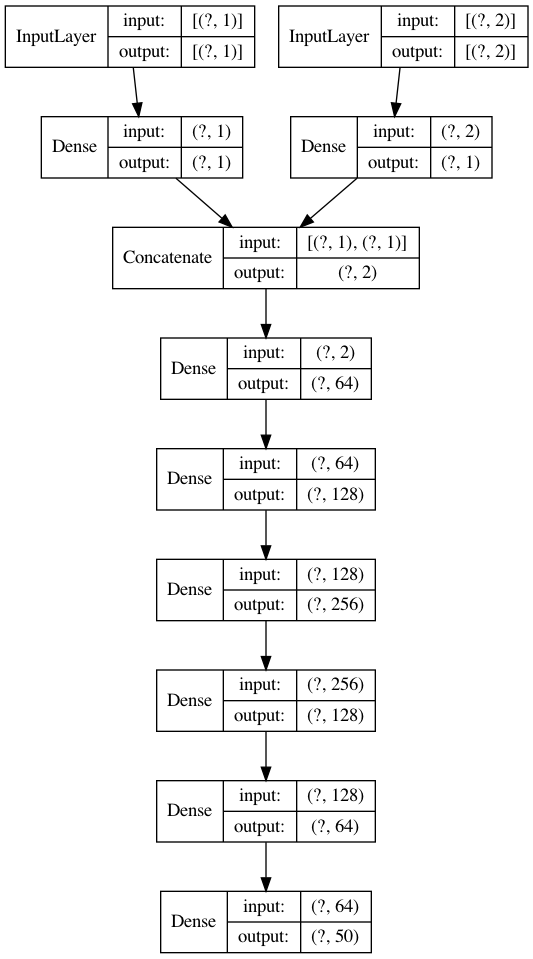

In [21]:
plot_model(model3, show_shapes=True, show_layer_names=False)

In [22]:
# 学習
epochs = 3000
batch_size = 128
history3 = model3.fit([x_size_train, x_position_train], y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test, x_position_test], y_test))

Epoch 1/3000
64/64 [==============================] - 0s 4ms/step - loss: 1.1170 - acc: 0.1014 - val_loss: 0.3383 - val_acc: 0.5821
Epoch 2/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3850 - acc: 0.3997 - val_loss: 0.3179 - val_acc: 0.3616
Epoch 3/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.3661 - acc: 0.5504 - val_loss: 0.3046 - val_acc: 0.3148
Epoch 4/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3535 - acc: 0.5301 - val_loss: 0.3073 - val_acc: 0.2210
Epoch 5/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3493 - acc: 0.4533 - val_loss: 0.2934 - val_acc: 0.5358
Epoch 6/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3438 - acc: 0.5292 - val_loss: 0.2964 - val_acc: 0.5076
Epoch 7/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3387 - acc: 0.5289 - val_loss: 0.2924 - val_acc: 0.4563
Epoch 8/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.

64/64 [==============================] - 0s 3ms/step - loss: 0.2548 - acc: 0.8242 - val_loss: 0.2225 - val_acc: 0.8865
Epoch 63/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2551 - acc: 0.8568 - val_loss: 0.2210 - val_acc: 0.9319
Epoch 64/3000
64/64 [==============================] - 0s 5ms/step - loss: 0.2571 - acc: 0.8913 - val_loss: 0.2171 - val_acc: 0.9196
Epoch 65/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2539 - acc: 0.8879 - val_loss: 0.2262 - val_acc: 0.9058
Epoch 66/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2563 - acc: 0.8499 - val_loss: 0.2266 - val_acc: 0.8180
Epoch 67/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2572 - acc: 0.8710 - val_loss: 0.2256 - val_acc: 0.8791
Epoch 68/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2556 - acc: 0.8740 - val_loss: 0.2181 - val_acc: 0.9142
Epoch 69/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2547 -

64/64 [==============================] - 0s 3ms/step - loss: 0.2396 - acc: 0.8868 - val_loss: 0.2161 - val_acc: 0.8934
Epoch 124/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2383 - acc: 0.9208 - val_loss: 0.2153 - val_acc: 0.9240
Epoch 125/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2362 - acc: 0.9056 - val_loss: 0.2208 - val_acc: 0.8984
Epoch 126/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2383 - acc: 0.8969 - val_loss: 0.2112 - val_acc: 0.8851
Epoch 127/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2552 - acc: 0.8874 - val_loss: 0.2199 - val_acc: 0.9299
Epoch 128/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2386 - acc: 0.9336 - val_loss: 0.2248 - val_acc: 0.9373
Epoch 129/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2406 - acc: 0.9080 - val_loss: 0.2172 - val_acc: 0.9127
Epoch 130/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.2325 - acc: 0.8997 - val_loss: 0.2331 - val_acc: 0.9329
Epoch 185/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2297 - acc: 0.7901 - val_loss: 0.2221 - val_acc: 0.9275
Epoch 186/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2294 - acc: 0.8896 - val_loss: 0.2255 - val_acc: 0.9452
Epoch 187/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2293 - acc: 0.8407 - val_loss: 0.2100 - val_acc: 0.9077
Epoch 188/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2440 - acc: 0.8716 - val_loss: 0.2060 - val_acc: 0.8969
Epoch 189/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2407 - acc: 0.8193 - val_loss: 0.2351 - val_acc: 0.8989
Epoch 190/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2373 - acc: 0.8929 - val_loss: 0.2294 - val_acc: 0.9378
Epoch 191/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.1705 - acc: 0.7594 - val_loss: 0.1522 - val_acc: 0.8786
Epoch 246/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1579 - acc: 0.8448 - val_loss: 0.1403 - val_acc: 0.9225
Epoch 247/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1350 - acc: 0.8324 - val_loss: 0.1351 - val_acc: 0.7474
Epoch 248/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1363 - acc: 0.8522 - val_loss: 0.1360 - val_acc: 0.9369
Epoch 249/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1346 - acc: 0.8748 - val_loss: 0.1375 - val_acc: 0.9058
Epoch 250/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1313 - acc: 0.8971 - val_loss: 0.1332 - val_acc: 0.9161
Epoch 251/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1338 - acc: 0.8871 - val_loss: 0.1295 - val_acc: 0.8885
Epoch 252/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.2646 - acc: 0.9186 - val_loss: 0.2557 - val_acc: 0.9635
Epoch 307/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2620 - acc: 0.9435 - val_loss: 0.2265 - val_acc: 0.9660
Epoch 308/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2396 - acc: 0.8842 - val_loss: 0.2295 - val_acc: 0.9655
Epoch 309/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2522 - acc: 0.7019 - val_loss: 0.3103 - val_acc: 0.9635
Epoch 310/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2462 - acc: 0.9080 - val_loss: 0.2086 - val_acc: 0.9655
Epoch 311/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2354 - acc: 0.8571 - val_loss: 0.2072 - val_acc: 0.9630
Epoch 312/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2146 - acc: 0.9494 - val_loss: 0.1880 - val_acc: 0.3300
Epoch 313/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.1526 - acc: 0.9598 - val_loss: 0.1612 - val_acc: 0.9566
Epoch 368/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1615 - acc: 0.9549 - val_loss: 0.1407 - val_acc: 0.9581
Epoch 369/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1636 - acc: 0.9541 - val_loss: 0.1406 - val_acc: 0.9561
Epoch 370/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1531 - acc: 0.9592 - val_loss: 0.1476 - val_acc: 0.9561
Epoch 371/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1600 - acc: 0.9599 - val_loss: 0.1454 - val_acc: 0.9581
Epoch 372/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1524 - acc: 0.9589 - val_loss: 0.1359 - val_acc: 0.9595
Epoch 373/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1557 - acc: 0.9001 - val_loss: 0.1422 - val_acc: 0.9595
Epoch 374/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.1197 - acc: 0.9498 - val_loss: 0.1360 - val_acc: 0.9240
Epoch 429/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1347 - acc: 0.9249 - val_loss: 0.1123 - val_acc: 0.9521
Epoch 430/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1332 - acc: 0.9459 - val_loss: 0.1424 - val_acc: 0.9492
Epoch 431/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1373 - acc: 0.8927 - val_loss: 0.1050 - val_acc: 0.9329
Epoch 432/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1306 - acc: 0.8562 - val_loss: 0.1159 - val_acc: 0.9383
Epoch 433/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1166 - acc: 0.9319 - val_loss: 0.1061 - val_acc: 0.9196
Epoch 434/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1136 - acc: 0.9407 - val_loss: 0.1278 - val_acc: 0.9147
Epoch 435/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 5ms/step - loss: 0.1041 - acc: 0.9574 - val_loss: 0.0941 - val_acc: 0.9546
Epoch 490/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1090 - acc: 0.9475 - val_loss: 0.1042 - val_acc: 0.9477
Epoch 491/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1773 - acc: 0.9277 - val_loss: 0.2271 - val_acc: 0.8555
Epoch 492/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1854 - acc: 0.8532 - val_loss: 0.1387 - val_acc: 0.8219
Epoch 493/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1239 - acc: 0.9175 - val_loss: 0.0981 - val_acc: 0.9645
Epoch 494/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1181 - acc: 0.9562 - val_loss: 0.0981 - val_acc: 0.9541
Epoch 495/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1027 - acc: 0.9616 - val_loss: 0.0954 - val_acc: 0.9600
Epoch 496/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0948 - acc: 0.9614 - val_loss: 0.0903 - val_acc: 0.9571
Epoch 551/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1262 - acc: 0.9592 - val_loss: 0.1831 - val_acc: 0.9507
Epoch 552/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1393 - acc: 0.9572 - val_loss: 0.1059 - val_acc: 0.9497
Epoch 553/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0970 - acc: 0.9591 - val_loss: 0.0887 - val_acc: 0.9591
Epoch 554/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1231 - acc: 0.9613 - val_loss: 0.1135 - val_acc: 0.9595
Epoch 555/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1176 - acc: 0.9616 - val_loss: 0.1217 - val_acc: 0.9610
Epoch 556/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1114 - acc: 0.9531 - val_loss: 0.1106 - val_acc: 0.9600
Epoch 557/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0831 - acc: 0.9639 - val_loss: 0.0818 - val_acc: 0.9605
Epoch 612/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0760 - acc: 0.9635 - val_loss: 0.0819 - val_acc: 0.9546
Epoch 613/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0768 - acc: 0.9623 - val_loss: 0.0906 - val_acc: 0.9625
Epoch 614/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0816 - acc: 0.9630 - val_loss: 0.0907 - val_acc: 0.9566
Epoch 615/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0802 - acc: 0.9641 - val_loss: 0.0740 - val_acc: 0.9591
Epoch 616/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0816 - acc: 0.9630 - val_loss: 0.0815 - val_acc: 0.9645
Epoch 617/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0757 - acc: 0.9651 - val_loss: 0.0700 - val_acc: 0.9615
Epoch 618/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0744 - acc: 0.9645 - val_loss: 0.0863 - val_acc: 0.9600
Epoch 673/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0741 - acc: 0.9639 - val_loss: 0.0790 - val_acc: 0.9600
Epoch 674/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0749 - acc: 0.9625 - val_loss: 0.0762 - val_acc: 0.9576
Epoch 675/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1219 - acc: 0.9605 - val_loss: 0.0825 - val_acc: 0.9556
Epoch 676/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0789 - acc: 0.9642 - val_loss: 0.0837 - val_acc: 0.9625
Epoch 677/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0794 - acc: 0.9644 - val_loss: 0.0779 - val_acc: 0.9650
Epoch 678/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0754 - acc: 0.9644 - val_loss: 0.0728 - val_acc: 0.9576
Epoch 679/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0944 - acc: 0.9631 - val_loss: 0.0924 - val_acc: 0.9556
Epoch 734/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0733 - acc: 0.9655 - val_loss: 0.0674 - val_acc: 0.9630
Epoch 735/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0717 - acc: 0.9660 - val_loss: 0.0729 - val_acc: 0.9581
Epoch 736/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0747 - acc: 0.9663 - val_loss: 0.0781 - val_acc: 0.9615
Epoch 737/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0728 - acc: 0.9647 - val_loss: 0.0917 - val_acc: 0.9571
Epoch 738/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.1295 - acc: 0.9629 - val_loss: 0.0779 - val_acc: 0.9640
Epoch 739/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0803 - acc: 0.9614 - val_loss: 0.0827 - val_acc: 0.9635
Epoch 740/3000
64/64 [==============================] - 0s 4ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0782 - acc: 0.9656 - val_loss: 0.1093 - val_acc: 0.9610
Epoch 795/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0766 - acc: 0.9632 - val_loss: 0.0704 - val_acc: 0.9645
Epoch 796/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0676 - acc: 0.9657 - val_loss: 0.0668 - val_acc: 0.9665
Epoch 797/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0660 - acc: 0.9661 - val_loss: 0.0659 - val_acc: 0.9600
Epoch 798/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0726 - acc: 0.9665 - val_loss: 0.0752 - val_acc: 0.9630
Epoch 799/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0919 - acc: 0.9634 - val_loss: 0.0753 - val_acc: 0.9610
Epoch 800/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0649 - acc: 0.9667 - val_loss: 0.0672 - val_acc: 0.9576
Epoch 801/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0720 - acc: 0.9652 - val_loss: 0.0698 - val_acc: 0.9615
Epoch 856/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0681 - acc: 0.9666 - val_loss: 0.0714 - val_acc: 0.9625
Epoch 857/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0736 - acc: 0.9660 - val_loss: 0.0704 - val_acc: 0.9561
Epoch 858/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0674 - acc: 0.9641 - val_loss: 0.0689 - val_acc: 0.9655
Epoch 859/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0694 - acc: 0.9669 - val_loss: 0.0729 - val_acc: 0.9655
Epoch 860/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0683 - acc: 0.9667 - val_loss: 0.0815 - val_acc: 0.9640
Epoch 861/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1383 - acc: 0.9641 - val_loss: 0.1024 - val_acc: 0.9610
Epoch 862/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0960 - acc: 0.9635 - val_loss: 0.0927 - val_acc: 0.9650
Epoch 917/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1053 - acc: 0.9644 - val_loss: 0.0884 - val_acc: 0.9625
Epoch 918/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0841 - acc: 0.9625 - val_loss: 0.0772 - val_acc: 0.9645
Epoch 919/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0854 - acc: 0.9641 - val_loss: 0.1283 - val_acc: 0.9625
Epoch 920/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1340 - acc: 0.9626 - val_loss: 0.0958 - val_acc: 0.9660
Epoch 921/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0812 - acc: 0.9661 - val_loss: 0.0734 - val_acc: 0.9625
Epoch 922/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.1660 - acc: 0.9613 - val_loss: 0.1773 - val_acc: 0.9512
Epoch 923/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

64/64 [==============================] - 0s 3ms/step - loss: 0.0941 - acc: 0.8915 - val_loss: 0.1022 - val_acc: 0.9482
Epoch 978/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1069 - acc: 0.7986 - val_loss: 0.0883 - val_acc: 0.9423
Epoch 979/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0993 - acc: 0.9225 - val_loss: 0.0940 - val_acc: 0.9551
Epoch 980/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0890 - acc: 0.7681 - val_loss: 0.0857 - val_acc: 0.7514
Epoch 981/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0802 - acc: 0.8093 - val_loss: 0.0752 - val_acc: 0.9482
Epoch 982/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0908 - acc: 0.8335 - val_loss: 0.0900 - val_acc: 0.9438
Epoch 983/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0879 - acc: 0.8294 - val_loss: 0.0859 - val_acc: 0.5126
Epoch 984/3000
64/64 [==============================] - 0s 3ms/step - loss: 0

Epoch 1038/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0748 - acc: 0.9589 - val_loss: 0.0820 - val_acc: 0.9551
Epoch 1039/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0775 - acc: 0.9592 - val_loss: 0.0726 - val_acc: 0.9526
Epoch 1040/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0768 - acc: 0.9579 - val_loss: 0.0939 - val_acc: 0.9561
Epoch 1041/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0834 - acc: 0.9581 - val_loss: 0.0738 - val_acc: 0.9551
Epoch 1042/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0885 - acc: 0.9571 - val_loss: 0.0723 - val_acc: 0.9517
Epoch 1043/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0807 - acc: 0.9572 - val_loss: 0.0828 - val_acc: 0.9556
Epoch 1044/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0719 - acc: 0.9581 - val_loss: 0.0652 - val_acc: 0.9512
Epoch 1045/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0678 - acc: 0.9647 - val_loss: 0.0857 - val_acc: 0.9665
Epoch 1099/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0946 - acc: 0.9642 - val_loss: 0.0778 - val_acc: 0.9655
Epoch 1100/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0785 - acc: 0.9631 - val_loss: 0.0742 - val_acc: 0.9640
Epoch 1101/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0684 - acc: 0.9647 - val_loss: 0.0773 - val_acc: 0.9635
Epoch 1102/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0822 - acc: 0.9632 - val_loss: 0.0759 - val_acc: 0.9640
Epoch 1103/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0683 - acc: 0.9642 - val_loss: 0.0827 - val_acc: 0.9679
Epoch 1104/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0782 - acc: 0.9646 - val_loss: 0.0762 - val_acc: 0.9665
Epoch 1105/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 1159/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0693 - acc: 0.9644 - val_loss: 0.0723 - val_acc: 0.9605
Epoch 1160/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0643 - acc: 0.9624 - val_loss: 0.0697 - val_acc: 0.9566
Epoch 1161/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0659 - acc: 0.9620 - val_loss: 0.0708 - val_acc: 0.9689
Epoch 1162/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0868 - acc: 0.9639 - val_loss: 0.0908 - val_acc: 0.9669
Epoch 1163/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0936 - acc: 0.9634 - val_loss: 0.0871 - val_acc: 0.9684
Epoch 1164/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0763 - acc: 0.9637 - val_loss: 0.0796 - val_acc: 0.9665
Epoch 1165/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0699 - acc: 0.9657 - val_loss: 0.0687 - val_acc: 0.9699
Epoch 1166/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.1071 - acc: 0.9651 - val_loss: 0.0739 - val_acc: 0.9660
Epoch 1220/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0762 - acc: 0.9672 - val_loss: 0.0923 - val_acc: 0.9714
Epoch 1221/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0816 - acc: 0.9651 - val_loss: 0.0760 - val_acc: 0.9684
Epoch 1222/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0820 - acc: 0.9651 - val_loss: 0.0889 - val_acc: 0.9655
Epoch 1223/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0943 - acc: 0.9641 - val_loss: 0.0897 - val_acc: 0.9645
Epoch 1224/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0916 - acc: 0.9619 - val_loss: 0.0773 - val_acc: 0.9679
Epoch 1225/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0716 - acc: 0.9658 - val_loss: 0.0729 - val_acc: 0.9625
Epoch 1226/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 1280/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0728 - acc: 0.9687 - val_loss: 0.0742 - val_acc: 0.9684
Epoch 1281/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0859 - acc: 0.9656 - val_loss: 0.0727 - val_acc: 0.9684
Epoch 1282/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0692 - acc: 0.9667 - val_loss: 0.0686 - val_acc: 0.9674
Epoch 1283/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0645 - acc: 0.9674 - val_loss: 0.0667 - val_acc: 0.9669
Epoch 1284/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0657 - acc: 0.9668 - val_loss: 0.0716 - val_acc: 0.9674
Epoch 1285/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0683 - acc: 0.9667 - val_loss: 0.0711 - val_acc: 0.9655
Epoch 1286/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0696 - acc: 0.9663 - val_loss: 0.0729 - val_acc: 0.9669
Epoch 1287/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0592 - acc: 0.9692 - val_loss: 0.0639 - val_acc: 0.9679
Epoch 1341/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0603 - acc: 0.9679 - val_loss: 0.0648 - val_acc: 0.9699
Epoch 1342/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0640 - acc: 0.9681 - val_loss: 0.0684 - val_acc: 0.9679
Epoch 1343/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0627 - acc: 0.9672 - val_loss: 0.0615 - val_acc: 0.9679
Epoch 1344/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0628 - acc: 0.9679 - val_loss: 0.0695 - val_acc: 0.9669
Epoch 1345/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0877 - acc: 0.9676 - val_loss: 0.0686 - val_acc: 0.9679
Epoch 1346/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0646 - acc: 0.9667 - val_loss: 0.0655 - val_acc: 0.9679
Epoch 1347/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 1401/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0644 - acc: 0.9667 - val_loss: 0.0683 - val_acc: 0.9645
Epoch 1402/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0645 - acc: 0.9677 - val_loss: 0.0693 - val_acc: 0.9660
Epoch 1403/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0981 - acc: 0.9658 - val_loss: 0.0838 - val_acc: 0.9645
Epoch 1404/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1065 - acc: 0.9645 - val_loss: 0.0905 - val_acc: 0.9674
Epoch 1405/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0791 - acc: 0.9673 - val_loss: 0.0696 - val_acc: 0.9674
Epoch 1406/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0748 - acc: 0.9667 - val_loss: 0.0755 - val_acc: 0.9684
Epoch 1407/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0700 - acc: 0.9668 - val_loss: 0.0687 - val_acc: 0.9689
Epoch 1408/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.1878 - acc: 0.9510 - val_loss: 0.1650 - val_acc: 0.9551
Epoch 1462/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1636 - acc: 0.9539 - val_loss: 0.1386 - val_acc: 0.9541
Epoch 1463/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1517 - acc: 0.9547 - val_loss: 0.1363 - val_acc: 0.9502
Epoch 1464/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1418 - acc: 0.9512 - val_loss: 0.1196 - val_acc: 0.9521
Epoch 1465/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1377 - acc: 0.9528 - val_loss: 0.1192 - val_acc: 0.9526
Epoch 1466/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1205 - acc: 0.9535 - val_loss: 0.0956 - val_acc: 0.9541
Epoch 1467/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1079 - acc: 0.9547 - val_loss: 0.1061 - val_acc: 0.9546
Epoch 1468/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 1522/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1124 - acc: 0.9519 - val_loss: 0.1745 - val_acc: 0.9403
Epoch 1523/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1233 - acc: 0.9508 - val_loss: 0.1167 - val_acc: 0.9403
Epoch 1524/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0955 - acc: 0.9487 - val_loss: 0.0813 - val_acc: 0.9447
Epoch 1525/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0739 - acc: 0.9500 - val_loss: 0.1080 - val_acc: 0.9452
Epoch 1526/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0968 - acc: 0.9505 - val_loss: 0.0803 - val_acc: 0.9472
Epoch 1527/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0921 - acc: 0.9573 - val_loss: 0.0741 - val_acc: 0.9595
Epoch 1528/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1057 - acc: 0.9529 - val_loss: 0.0924 - val_acc: 0.9413
Epoch 1529/3000
64/64 [==============================] 

64/64 [==============================] - 0s 4ms/step - loss: 0.0942 - acc: 0.9551 - val_loss: 0.0735 - val_acc: 0.9526
Epoch 1583/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0927 - acc: 0.9494 - val_loss: 0.0682 - val_acc: 0.9438
Epoch 1584/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0660 - acc: 0.9520 - val_loss: 0.0640 - val_acc: 0.9551
Epoch 1585/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0638 - acc: 0.9546 - val_loss: 0.0840 - val_acc: 0.9556
Epoch 1586/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0724 - acc: 0.9545 - val_loss: 0.0704 - val_acc: 0.9531
Epoch 1587/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0638 - acc: 0.9551 - val_loss: 0.0640 - val_acc: 0.9477
Epoch 1588/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0741 - acc: 0.9555 - val_loss: 0.0704 - val_acc: 0.9531
Epoch 1589/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 1643/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0733 - acc: 0.9539 - val_loss: 0.0819 - val_acc: 0.9546
Epoch 1644/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1094 - acc: 0.9535 - val_loss: 0.0907 - val_acc: 0.9551
Epoch 1645/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0792 - acc: 0.9549 - val_loss: 0.1300 - val_acc: 0.9551
Epoch 1646/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1087 - acc: 0.9556 - val_loss: 0.0847 - val_acc: 0.9546
Epoch 1647/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0751 - acc: 0.9589 - val_loss: 0.0699 - val_acc: 0.9635
Epoch 1648/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0640 - acc: 0.9574 - val_loss: 0.0644 - val_acc: 0.9571
Epoch 1649/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0668 - acc: 0.9563 - val_loss: 0.0692 - val_acc: 0.9482
Epoch 1650/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0549 - acc: 0.9631 - val_loss: 0.0663 - val_acc: 0.9635
Epoch 1704/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1534 - acc: 0.9572 - val_loss: 0.1405 - val_acc: 0.9487
Epoch 1705/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0891 - acc: 0.9568 - val_loss: 0.0729 - val_acc: 0.9625
Epoch 1706/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0613 - acc: 0.9614 - val_loss: 0.0621 - val_acc: 0.9665
Epoch 1707/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0640 - acc: 0.9610 - val_loss: 0.0675 - val_acc: 0.9650
Epoch 1708/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0592 - acc: 0.9624 - val_loss: 0.0629 - val_acc: 0.9595
Epoch 1709/3000
64/64 [==============================] - 0s 6ms/step - loss: 0.0559 - acc: 0.9592 - val_loss: 0.0611 - val_acc: 0.9615
Epoch 1710/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 1764/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0766 - acc: 0.9611 - val_loss: 0.0748 - val_acc: 0.9581
Epoch 1765/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0692 - acc: 0.9614 - val_loss: 0.0677 - val_acc: 0.9586
Epoch 1766/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0689 - acc: 0.9625 - val_loss: 0.0663 - val_acc: 0.9615
Epoch 1767/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0647 - acc: 0.9620 - val_loss: 0.0669 - val_acc: 0.9581
Epoch 1768/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0683 - acc: 0.9619 - val_loss: 0.0785 - val_acc: 0.9586
Epoch 1769/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0739 - acc: 0.9632 - val_loss: 0.0716 - val_acc: 0.9595
Epoch 1770/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0741 - acc: 0.9605 - val_loss: 0.0697 - val_acc: 0.9586
Epoch 1771/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0757 - acc: 0.9587 - val_loss: 0.0641 - val_acc: 0.9536
Epoch 1825/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0666 - acc: 0.9566 - val_loss: 0.0643 - val_acc: 0.9507
Epoch 1826/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0716 - acc: 0.9577 - val_loss: 0.0684 - val_acc: 0.9512
Epoch 1827/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0685 - acc: 0.9604 - val_loss: 0.0624 - val_acc: 0.9610
Epoch 1828/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0571 - acc: 0.9615 - val_loss: 0.0573 - val_acc: 0.9600
Epoch 1829/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0640 - acc: 0.9598 - val_loss: 0.0746 - val_acc: 0.9502
Epoch 1830/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0704 - acc: 0.9618 - val_loss: 0.0644 - val_acc: 0.9521
Epoch 1831/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 1885/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1876 - acc: 0.9558 - val_loss: 0.1628 - val_acc: 0.9566
Epoch 1886/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1098 - acc: 0.9621 - val_loss: 0.0826 - val_acc: 0.9551
Epoch 1887/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0900 - acc: 0.9583 - val_loss: 0.0791 - val_acc: 0.9497
Epoch 1888/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0798 - acc: 0.9574 - val_loss: 0.0735 - val_acc: 0.9586
Epoch 1889/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1148 - acc: 0.9628 - val_loss: 0.0766 - val_acc: 0.9610
Epoch 1890/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0845 - acc: 0.9635 - val_loss: 0.0669 - val_acc: 0.9615
Epoch 1891/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0623 - acc: 0.9595 - val_loss: 0.0686 - val_acc: 0.9586
Epoch 1892/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0663 - acc: 0.9610 - val_loss: 0.0723 - val_acc: 0.9650
Epoch 1946/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0644 - acc: 0.9632 - val_loss: 0.0658 - val_acc: 0.9556
Epoch 1947/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0611 - acc: 0.9609 - val_loss: 0.0671 - val_acc: 0.9581
Epoch 1948/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0612 - acc: 0.9623 - val_loss: 0.0636 - val_acc: 0.9615
Epoch 1949/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0639 - acc: 0.9625 - val_loss: 0.0667 - val_acc: 0.9595
Epoch 1950/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0628 - acc: 0.9630 - val_loss: 0.0628 - val_acc: 0.9556
Epoch 1951/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0564 - acc: 0.9625 - val_loss: 0.0627 - val_acc: 0.9561
Epoch 1952/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 2006/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0671 - acc: 0.9628 - val_loss: 0.0675 - val_acc: 0.9665
Epoch 2007/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.1122 - acc: 0.9587 - val_loss: 0.0732 - val_acc: 0.9595
Epoch 2008/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0674 - acc: 0.9591 - val_loss: 0.0629 - val_acc: 0.9595
Epoch 2009/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0541 - acc: 0.9637 - val_loss: 0.0569 - val_acc: 0.9650
Epoch 2010/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0548 - acc: 0.9618 - val_loss: 0.0541 - val_acc: 0.9576
Epoch 2011/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0549 - acc: 0.9634 - val_loss: 0.0625 - val_acc: 0.9600
Epoch 2012/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0546 - acc: 0.9625 - val_loss: 0.0570 - val_acc: 0.9526
Epoch 2013/3000
64/64 [==============================] 

64/64 [==============================] - 0s 4ms/step - loss: 0.1245 - acc: 0.9605 - val_loss: 0.1252 - val_acc: 0.9507
Epoch 2067/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0942 - acc: 0.9598 - val_loss: 0.0728 - val_acc: 0.9615
Epoch 2068/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0669 - acc: 0.9623 - val_loss: 0.1020 - val_acc: 0.9620
Epoch 2069/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0768 - acc: 0.9588 - val_loss: 0.0774 - val_acc: 0.9605
Epoch 2070/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0823 - acc: 0.9611 - val_loss: 0.0802 - val_acc: 0.9586
Epoch 2071/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1083 - acc: 0.9618 - val_loss: 0.1108 - val_acc: 0.9615
Epoch 2072/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0699 - acc: 0.9620 - val_loss: 0.0626 - val_acc: 0.9605
Epoch 2073/3000
64/64 [==============================] - 0s 4ms/step - 

Epoch 2127/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1313 - acc: 0.9613 - val_loss: 0.0910 - val_acc: 0.9605
Epoch 2128/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0819 - acc: 0.9611 - val_loss: 0.0615 - val_acc: 0.9640
Epoch 2129/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0615 - acc: 0.9603 - val_loss: 0.0607 - val_acc: 0.9581
Epoch 2130/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0587 - acc: 0.9657 - val_loss: 0.0539 - val_acc: 0.9640
Epoch 2131/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0475 - acc: 0.9645 - val_loss: 0.0506 - val_acc: 0.9679
Epoch 2132/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0482 - acc: 0.9653 - val_loss: 0.0603 - val_acc: 0.9620
Epoch 2133/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0521 - acc: 0.9645 - val_loss: 0.0551 - val_acc: 0.9620
Epoch 2134/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0563 - acc: 0.9644 - val_loss: 0.0538 - val_acc: 0.9645
Epoch 2188/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0477 - acc: 0.9656 - val_loss: 0.0509 - val_acc: 0.9669
Epoch 2189/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0516 - acc: 0.9644 - val_loss: 0.0582 - val_acc: 0.9591
Epoch 2190/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0523 - acc: 0.9650 - val_loss: 0.0722 - val_acc: 0.9615
Epoch 2191/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0657 - acc: 0.9623 - val_loss: 0.0624 - val_acc: 0.9635
Epoch 2192/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0871 - acc: 0.9629 - val_loss: 0.0621 - val_acc: 0.9620
Epoch 2193/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0550 - acc: 0.9655 - val_loss: 0.0539 - val_acc: 0.9620
Epoch 2194/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 2248/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1044 - acc: 0.9632 - val_loss: 0.0759 - val_acc: 0.9581
Epoch 2249/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0891 - acc: 0.9632 - val_loss: 0.0751 - val_acc: 0.9507
Epoch 2250/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0938 - acc: 0.9615 - val_loss: 0.0824 - val_acc: 0.9487
Epoch 2251/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1032 - acc: 0.9565 - val_loss: 0.0840 - val_acc: 0.9477
Epoch 2252/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0936 - acc: 0.9566 - val_loss: 0.1067 - val_acc: 0.9512
Epoch 2253/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0946 - acc: 0.9572 - val_loss: 0.0721 - val_acc: 0.9517
Epoch 2254/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0778 - acc: 0.9589 - val_loss: 0.0714 - val_acc: 0.9566
Epoch 2255/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0824 - acc: 0.9608 - val_loss: 0.0831 - val_acc: 0.9571
Epoch 2309/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1351 - acc: 0.9619 - val_loss: 0.0821 - val_acc: 0.9595
Epoch 2310/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0773 - acc: 0.9626 - val_loss: 0.0678 - val_acc: 0.9586
Epoch 2311/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0745 - acc: 0.9616 - val_loss: 0.0886 - val_acc: 0.9551
Epoch 2312/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1010 - acc: 0.9614 - val_loss: 0.0794 - val_acc: 0.9605
Epoch 2313/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0798 - acc: 0.9619 - val_loss: 0.0688 - val_acc: 0.9561
Epoch 2314/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0723 - acc: 0.9626 - val_loss: 0.0659 - val_acc: 0.9541
Epoch 2315/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 2369/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0552 - acc: 0.9655 - val_loss: 0.0554 - val_acc: 0.9650
Epoch 2370/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0520 - acc: 0.9658 - val_loss: 0.0557 - val_acc: 0.9650
Epoch 2371/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0655 - acc: 0.9663 - val_loss: 0.0578 - val_acc: 0.9635
Epoch 2372/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0630 - acc: 0.9651 - val_loss: 0.0559 - val_acc: 0.9655
Epoch 2373/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.1019 - acc: 0.9645 - val_loss: 0.0746 - val_acc: 0.9640
Epoch 2374/3000
64/64 [==============================] - 0s 4ms/step - loss: 0.0690 - acc: 0.9646 - val_loss: 0.0620 - val_acc: 0.9645
Epoch 2375/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0569 - acc: 0.9667 - val_loss: 0.0609 - val_acc: 0.9679
Epoch 2376/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0934 - acc: 0.9640 - val_loss: 0.0698 - val_acc: 0.9640
Epoch 2430/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0937 - acc: 0.9642 - val_loss: 0.0708 - val_acc: 0.9645
Epoch 2431/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0686 - acc: 0.9668 - val_loss: 0.0615 - val_acc: 0.9620
Epoch 2432/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0557 - acc: 0.9662 - val_loss: 0.0606 - val_acc: 0.9605
Epoch 2433/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0547 - acc: 0.9658 - val_loss: 0.0603 - val_acc: 0.9655
Epoch 2434/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0504 - acc: 0.9666 - val_loss: 0.0575 - val_acc: 0.9655
Epoch 2435/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0500 - acc: 0.9679 - val_loss: 0.0534 - val_acc: 0.9655
Epoch 2436/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 2490/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0614 - acc: 0.9661 - val_loss: 0.0663 - val_acc: 0.9645
Epoch 2491/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2140 - acc: 0.9587 - val_loss: 0.3059 - val_acc: 0.9359
Epoch 2492/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.3357 - acc: 0.9515 - val_loss: 0.2688 - val_acc: 0.9655
Epoch 2493/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2930 - acc: 0.9630 - val_loss: 0.2739 - val_acc: 0.9640
Epoch 2494/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2883 - acc: 0.9608 - val_loss: 0.2648 - val_acc: 0.9655
Epoch 2495/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2857 - acc: 0.9635 - val_loss: 0.2507 - val_acc: 0.9660
Epoch 2496/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2824 - acc: 0.9616 - val_loss: 0.2547 - val_acc: 0.9650
Epoch 2497/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.2620 - acc: 0.9648 - val_loss: 0.2507 - val_acc: 0.9630
Epoch 2551/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2632 - acc: 0.9629 - val_loss: 0.2847 - val_acc: 0.9541
Epoch 2552/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2646 - acc: 0.9600 - val_loss: 0.2434 - val_acc: 0.9660
Epoch 2553/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2707 - acc: 0.9641 - val_loss: 0.2328 - val_acc: 0.9640
Epoch 2554/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2602 - acc: 0.9634 - val_loss: 0.2383 - val_acc: 0.9645
Epoch 2555/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2583 - acc: 0.9631 - val_loss: 0.2279 - val_acc: 0.9635
Epoch 2556/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2538 - acc: 0.9632 - val_loss: 0.2259 - val_acc: 0.9645
Epoch 2557/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 2611/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2371 - acc: 0.9625 - val_loss: 0.2220 - val_acc: 0.9620
Epoch 2612/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2362 - acc: 0.9609 - val_loss: 0.2067 - val_acc: 0.9610
Epoch 2613/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2275 - acc: 0.9615 - val_loss: 0.2002 - val_acc: 0.9625
Epoch 2614/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2232 - acc: 0.9616 - val_loss: 0.1972 - val_acc: 0.9615
Epoch 2615/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2276 - acc: 0.9604 - val_loss: 0.1954 - val_acc: 0.9660
Epoch 2616/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2187 - acc: 0.9636 - val_loss: 0.1913 - val_acc: 0.9640
Epoch 2617/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.2135 - acc: 0.9620 - val_loss: 0.1919 - val_acc: 0.9640
Epoch 2618/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.1506 - acc: 0.9607 - val_loss: 0.1198 - val_acc: 0.9600
Epoch 2672/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1415 - acc: 0.9640 - val_loss: 0.1048 - val_acc: 0.9605
Epoch 2673/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1307 - acc: 0.9626 - val_loss: 0.1291 - val_acc: 0.9591
Epoch 2674/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1567 - acc: 0.9618 - val_loss: 0.1079 - val_acc: 0.9605
Epoch 2675/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1132 - acc: 0.9625 - val_loss: 0.0913 - val_acc: 0.9605
Epoch 2676/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1208 - acc: 0.9623 - val_loss: 0.1047 - val_acc: 0.9605
Epoch 2677/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1181 - acc: 0.9615 - val_loss: 0.1072 - val_acc: 0.9581
Epoch 2678/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 2732/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0620 - acc: 0.9640 - val_loss: 0.0666 - val_acc: 0.9586
Epoch 2733/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0717 - acc: 0.9639 - val_loss: 0.1494 - val_acc: 0.9625
Epoch 2734/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0980 - acc: 0.9632 - val_loss: 0.0684 - val_acc: 0.9625
Epoch 2735/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0842 - acc: 0.9644 - val_loss: 0.0941 - val_acc: 0.9605
Epoch 2736/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0802 - acc: 0.9634 - val_loss: 0.0712 - val_acc: 0.9595
Epoch 2737/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0717 - acc: 0.9635 - val_loss: 0.0751 - val_acc: 0.9586
Epoch 2738/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0771 - acc: 0.9629 - val_loss: 0.0886 - val_acc: 0.9600
Epoch 2739/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0739 - acc: 0.9658 - val_loss: 0.0703 - val_acc: 0.9630
Epoch 2793/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0832 - acc: 0.9636 - val_loss: 0.1378 - val_acc: 0.9586
Epoch 2794/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0855 - acc: 0.9655 - val_loss: 0.1005 - val_acc: 0.9620
Epoch 2795/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0774 - acc: 0.9647 - val_loss: 0.0669 - val_acc: 0.9605
Epoch 2796/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0606 - acc: 0.9662 - val_loss: 0.0652 - val_acc: 0.9600
Epoch 2797/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0685 - acc: 0.9662 - val_loss: 0.3166 - val_acc: 0.9605
Epoch 2798/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.1270 - acc: 0.9609 - val_loss: 0.0881 - val_acc: 0.9605
Epoch 2799/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 2853/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0782 - acc: 0.9668 - val_loss: 0.0624 - val_acc: 0.9660
Epoch 2854/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0819 - acc: 0.9658 - val_loss: 0.0695 - val_acc: 0.9674
Epoch 2855/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0854 - acc: 0.9667 - val_loss: 0.0746 - val_acc: 0.9645
Epoch 2856/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0702 - acc: 0.9668 - val_loss: 0.0644 - val_acc: 0.9645
Epoch 2857/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0600 - acc: 0.9679 - val_loss: 0.0665 - val_acc: 0.9669
Epoch 2858/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0629 - acc: 0.9687 - val_loss: 0.0713 - val_acc: 0.9605
Epoch 2859/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0779 - acc: 0.9669 - val_loss: 0.0715 - val_acc: 0.9669
Epoch 2860/3000
64/64 [==============================] 

64/64 [==============================] - 0s 3ms/step - loss: 0.0602 - acc: 0.9671 - val_loss: 0.0590 - val_acc: 0.9630
Epoch 2914/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0599 - acc: 0.9678 - val_loss: 0.0602 - val_acc: 0.9665
Epoch 2915/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0662 - acc: 0.9657 - val_loss: 0.0784 - val_acc: 0.9620
Epoch 2916/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0747 - acc: 0.9668 - val_loss: 0.0673 - val_acc: 0.9679
Epoch 2917/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0650 - acc: 0.9682 - val_loss: 0.0651 - val_acc: 0.9645
Epoch 2918/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0691 - acc: 0.9661 - val_loss: 0.0712 - val_acc: 0.9635
Epoch 2919/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0556 - acc: 0.9677 - val_loss: 0.0582 - val_acc: 0.9684
Epoch 2920/3000
64/64 [==============================] - 0s 3ms/step - 

Epoch 2974/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0606 - acc: 0.9672 - val_loss: 0.0599 - val_acc: 0.9620
Epoch 2975/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0606 - acc: 0.9673 - val_loss: 0.0615 - val_acc: 0.9635
Epoch 2976/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0558 - acc: 0.9672 - val_loss: 0.0585 - val_acc: 0.9615
Epoch 2977/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0583 - acc: 0.9665 - val_loss: 0.0571 - val_acc: 0.9655
Epoch 2978/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0558 - acc: 0.9676 - val_loss: 0.0582 - val_acc: 0.9635
Epoch 2979/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0620 - acc: 0.9665 - val_loss: 0.0682 - val_acc: 0.9600
Epoch 2980/3000
64/64 [==============================] - 0s 3ms/step - loss: 0.0597 - acc: 0.9672 - val_loss: 0.0616 - val_acc: 0.9630
Epoch 2981/3000
64/64 [==============================] 

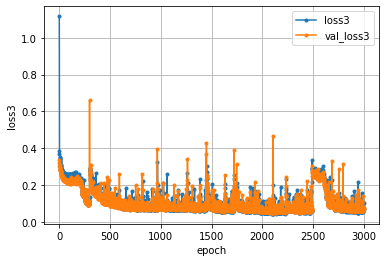

[1.1169880628585815, 0.38502585887908936, 0.36612755060195923, 0.35350310802459717, 0.3493465781211853, 0.34383687376976013, 0.3386656641960144, 0.33613601326942444, 0.3301768898963928, 0.32495298981666565, 0.3189926743507385, 0.31513547897338867, 0.30961793661117554, 0.30649736523628235, 0.3035520017147064, 0.2997296452522278, 0.2941895127296448, 0.28966543078422546, 0.2858193814754486, 0.2843042314052582, 0.2804722189903259, 0.2820007801055908, 0.2810257077217102, 0.28207677602767944, 0.27875277400016785, 0.27985450625419617, 0.2766522765159607, 0.2749297618865967, 0.27226439118385315, 0.27035027742385864, 0.2722732424736023, 0.26867595314979553, 0.2688855230808258, 0.26951271295547485, 0.27205798029899597, 0.2713785171508789, 0.26711103320121765, 0.2669086158275604, 0.26691868901252747, 0.2656235992908478, 0.2645016312599182, 0.26298364996910095, 0.2647470533847809, 0.26540708541870117, 0.263937383890152, 0.2678165137767792, 0.25980475544929504, 0.258675754070282, 0.2587549686431885

In [23]:
# 学習経過の可視化(大きさ)
loss3     = history3.history['loss']
val_loss3 = history3.history['val_loss']

nb_epoch = len(loss3)
plt.plot(range(nb_epoch), loss3,     marker='.', label='loss3')
plt.plot(range(nb_epoch), val_loss3, marker='.', label='val_loss3')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss3')
plt.show()
print(loss3)

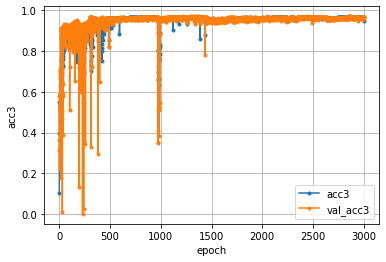

In [24]:
# 学習経過の可視化(大きさ)
acc3     = history3.history['acc']
val_acc3 = history3.history['val_acc']

nb_epoch = len(acc3)
plt.plot(range(nb_epoch), acc3,     marker='.', label='acc3')
plt.plot(range(nb_epoch), val_acc3, marker='.', label='val_acc3')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc3')
plt.show()

In [26]:
predict3 = model3.predict([x_size_test, x_position_test])
print(x_position_test[0])
print(predict3[0]-y_test[0])
print(x_position_test[1])
print(predict3[1]-y_test[1])

[[44.5]
 [21.5]]
[ 1.18845200e-01  1.20415443e-01  1.20373609e-01  1.19219349e-01
  1.20008869e-01  1.19439438e-01  1.18591799e-01  1.12626331e-01
  1.11929493e-01  1.14857857e-01  1.10532067e-01  1.11284378e-01
  1.16640423e-01  1.13476178e-01  1.16473644e-01  1.16448129e-01
  1.14296040e-01  1.10605277e-01  9.94230086e-02  8.70625673e-02
  6.92035188e-02  7.14491589e-02  6.48919493e-04 -9.76741314e-04
  1.66706741e-04 -4.34237532e-04 -4.96797264e-04  3.23832528e-02
  1.80473215e-03 -1.48837669e-02 -1.52488451e-02 -2.04574438e-02
 -2.49848012e-02 -3.58318039e-02 -4.80136103e-02 -5.22895804e-02
 -6.13743674e-02 -6.05962284e-02 -6.86616833e-02 -7.87922799e-02
 -9.00240907e-02 -9.66988876e-02 -1.09701327e-01 -1.19378219e-01
 -1.35571480e-01 -1.42249806e-01 -1.56545463e-01 -1.60225367e-01
 -1.68305148e-01 -1.71078413e-01]
[[29.5]
 [ 9.5]]
[ 3.93302725e-02  3.81135802e-02  4.77153646e-02  6.22293569e-02
  7.15351504e-02  8.26448970e-02  9.19337301e-02  1.06735091e-01
  1.24409130e-01  1.38

In [27]:
print(y_test[0])

[ 2.631197  2.609581  2.582744  2.521944  2.440358  2.337063  2.171674
  2.013566  1.979129  1.889566  1.767642  1.622913  1.482021  1.237357
  1.05247   0.79742   0.128597 -0.407623 -0.514515 -1.170001 -2.215696
 -1.821648  0.        0.        0.        0.        0.       -2.438798
 -1.979741 -2.00545  -1.794802 -1.379466 -1.342495 -1.878209 -2.009178
 -2.093012 -2.127801 -2.208884 -2.159616 -2.26857  -2.331988 -2.2522
 -2.31719  -2.524042 -2.604249 -2.707186 -2.917216 -3.007988 -3.072078
 -3.09285 ]
